# Estimating distributions (part 2)
The goal of this notebook is to explore a first approach to approximate $p(y|x)$ and $p(x|y)$ on a tabular dataset where $x$ is real-valued, $x\in\mathbb{R}^k$, and the target $y$ is discrete and finite, $y\in\{0,\ldots,d\}⊆\mathbb{N}, d\geq 1$.

## Imports

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

## Load data set

In [2]:
iris = datasets.load_iris()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X = iris.data
y = iris.target

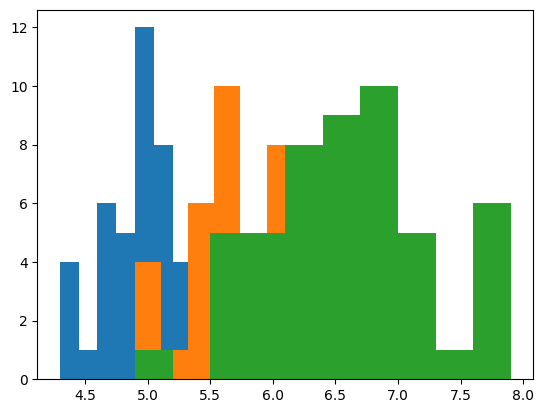

In [6]:
x = X[:,0]
for i in range(3):
    plt.hist(x[y==i])

## Approximate $p(y|x)$
Take $x$ to be sepal length and estimate the conditional probability of the target variable $y$ given $x$. Then, sample 10 values of $y$ given a $x=4.75$.

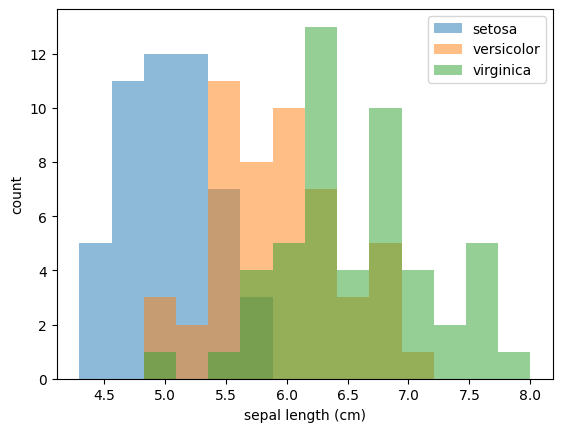

In [15]:
x = X[:,0]

bins = np.linspace(4.3,8,15)

for i in range(3):
    plt.hist(x[y==i],bins,alpha=0.5, label=iris.target_names[i])
    
plt.legend(loc='upper right')
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
plt.show()

In [16]:
hist = np.zeros((3,14))
for i in range(3):
    lengths = x[y==i]
    hist[i] =  np.histogram(lengths, bins)[0]


In [17]:
hist

array([[ 5., 11., 12., 12.,  7.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  3.,  2., 11.,  8., 10.,  7.,  3.,  5.,  1.,  0.,  0.,
         0.],
       [ 0.,  0.,  1.,  0.,  1.,  4.,  5., 13.,  4., 10.,  4.,  2.,  5.,
         1.]])

In [18]:
bins

array([4.3       , 4.56428571, 4.82857143, 5.09285714, 5.35714286,
       5.62142857, 5.88571429, 6.15      , 6.41428571, 6.67857143,
       6.94285714, 7.20714286, 7.47142857, 7.73571429, 8.        ])

In [19]:
counts = pd.DataFrame(hist, columns=['4.3-4.6','4.6-4.8','4.8-5.1','5.1-5.4','5.4-5.6','5.6-5.8','5.8-6.1','6.1-6.4','6.4-6.7','6.7-6.9','6.9-7.2','7.2-7.5','7.5-7.7','7.7-8'], index=['setosa','versicolor','virginica'])	
counts

,4.3-4.6,4.6-4.8,4.8-5.1,5.1-5.4,5.4-5.6,5.6-5.8,5.8-6.1,6.1-6.4,6.4-6.7,6.7-6.9,6.9-7.2,7.2-7.5,7.5-7.7,7.7-8
setosa,5.0,11.0,12.0,12.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
versicolor,0.0,0.0,3.0,2.0,11.0,8.0,10.0,7.0,3.0,5.0,1.0,0.0,0.0,0.0
virginica,0.0,0.0,1.0,0.0,1.0,4.0,5.0,13.0,4.0,10.0,4.0,2.0,5.0,1.0


In [20]:
proba = counts
for i in range(counts.shape[1]):
    proba.iloc[:,i] = proba.iloc[:,i]/proba.iloc[:,i].sum()
proba

,4.3-4.6,4.6-4.8,4.8-5.1,5.1-5.4,5.4-5.6,5.6-5.8,5.8-6.1,6.1-6.4,6.4-6.7,6.7-6.9,6.9-7.2,7.2-7.5,7.5-7.7,7.7-8
setosa,1.0,1.0,0.7500,0.857143,0.368421,0.200000,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0
versicolor,0.0,0.0,0.1875,0.142857,0.578947,0.533333,0.666667,0.35,0.428571,0.333333,0.2,0.0,0.0,0.0
virginica,0.0,0.0,0.0625,0.000000,0.052632,0.266667,0.333333,0.65,0.571429,0.666667,0.8,1.0,1.0,1.0


In [21]:
np.random.choice(iris.target_names, size=10, p=proba['4.6-4.8'])

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

## Approximate $p(x|y)$
Take $y$ to be setosa and estimate the probability of sepal length given setosa (or, equivalently, the *likelihood* of setosa given sepal length). Then, generate 10 samples of sepal length and label them appropriately.

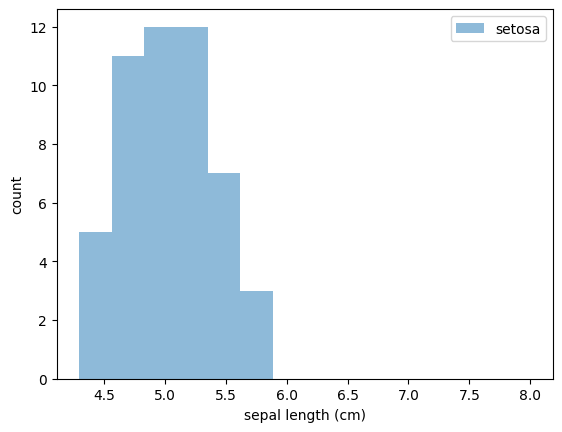

In [22]:
x = X[:,0]

bins = np.linspace(4.3,8,15)

plt.hist(x[y==0],bins,alpha=0.5, label=iris.target_names[0])
    
plt.legend(loc='upper right')
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
plt.show()

In [23]:
setosa_lengths = x[y==0]
setosa_hist = np.histogram(setosa_lengths, bins)[0]
setosa_hist

array([ 5, 11, 12, 12,  7,  3,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [24]:
setosa_proba = setosa_hist / np.sum(setosa_hist)
setosa_proba

array([0.1 , 0.22, 0.24, 0.24, 0.14, 0.06, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  ])

In [25]:
setosa_valores = np.random.choice(bins[:-1], size=10, p=setosa_proba)
setosa_valores

array([4.82857143, 4.3       , 4.82857143, 5.09285714, 5.09285714,
       5.35714286, 5.09285714, 4.56428571, 4.82857143, 4.82857143])

In [26]:
def get_low_high(bins, valor):
    for i in range(len(bins) - 1):
        if bins[i] == valor:
            return bins[i], bins[i+1]

In [27]:
for setosa_valor in setosa_valores:
    low, high = get_low_high(bins, setosa_valor)
    print("---")
    print(low, high)
    print(np.random.uniform(low, high, size=1))

---
4.828571428571428 5.0928571428571425
[5.06291849]
---
4.3 4.564285714285714
[4.33035354]
---
4.828571428571428 5.0928571428571425
[4.87770527]
---
5.0928571428571425 5.357142857142857
[5.31480075]
---
5.0928571428571425 5.357142857142857
[5.32710216]
---
5.357142857142857 5.621428571428571
[5.51886976]
---
5.0928571428571425 5.357142857142857
[5.23081266]
---
4.564285714285714 4.828571428571428
[4.67073584]
---
4.828571428571428 5.0928571428571425
[4.96693921]
---
4.828571428571428 5.0928571428571425
[4.9813939]


In [28]:
np.random.uniform(low, high, size=10)

array([4.96611086, 4.98941826, 4.98060968, 4.89787819, 5.02793399,
       4.97378265, 4.9575146 , 4.96344049, 4.85797867, 5.05360353])

# P(Y)

In [29]:
Y = iris.target

count_class_0, count_class_1, count_class_2 = np.bincount(Y)
target_names = iris.target_names

y_values = [count_class_0, count_class_1, count_class_2]
p_y = y_values / np.sum(y_values)

df = pd.DataFrame(data = {'Proba': p_y, 'Labels': target_names})
df

,Proba,Labels
0,0.333333,setosa
1,0.333333,versicolor
2,0.333333,virginica


# P(X| y=Versicolor)

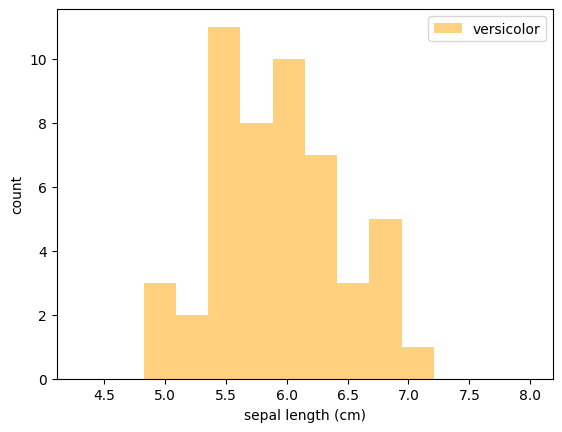

In [30]:
x = X[:,0]

bins = np.linspace(4.3,8,15)

plt.hist(x[y==1],bins,alpha=0.5, label=iris.target_names[1], color='orange')
    
plt.legend(loc='upper right')
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
plt.show()

In [31]:
versicolor_lengths = x[y==1]
versicolor_hist = np.histogram(versicolor_lengths, bins)[0]
versicolor_hist

array([ 0,  0,  3,  2, 11,  8, 10,  7,  3,  5,  1,  0,  0,  0],
      dtype=int64)

In [32]:
versicolor_proba = versicolor_hist / np.sum(versicolor_hist)
versicolor_proba

array([0.  , 0.  , 0.06, 0.04, 0.22, 0.16, 0.2 , 0.14, 0.06, 0.1 , 0.02,
       0.  , 0.  , 0.  ])

In [33]:
versicolor_valores = np.random.choice(bins[:-1], size=10, p=versicolor_proba)
versicolor_valores

array([5.62142857, 5.09285714, 5.62142857, 5.62142857, 5.09285714,
       5.35714286, 6.67857143, 4.82857143, 6.15      , 6.67857143])

In [34]:
for versicolor_valor in versicolor_valores:
    low, high = get_low_high(bins, versicolor_valor)
    print("---")
    print(low, high)
    print(np.random.uniform(low, high, size=1))

---
5.621428571428571 5.885714285714286
[5.75035187]
---
5.0928571428571425 5.357142857142857
[5.09831178]
---
5.621428571428571 5.885714285714286
[5.68838049]
---
5.621428571428571 5.885714285714286
[5.86430551]
---
5.0928571428571425 5.357142857142857
[5.18711067]
---
5.357142857142857 5.621428571428571
[5.51531317]
---
6.678571428571429 6.942857142857143
[6.79749508]
---
4.828571428571428 5.0928571428571425
[5.03027002]
---
6.15 6.414285714285715
[6.26249]
---
6.678571428571429 6.942857142857143
[6.69271821]


# P(X| y=Virginica)

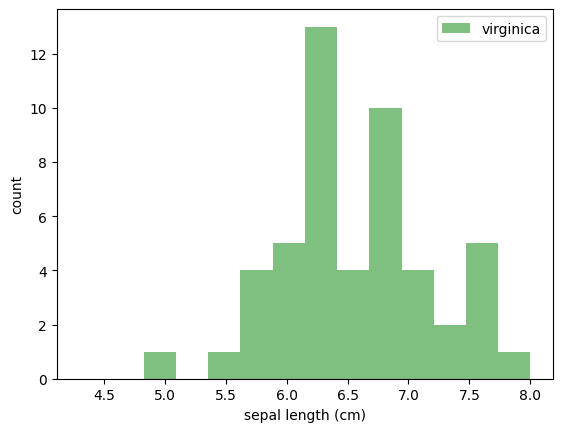

In [36]:
x = X[:,0]

bins = np.linspace(4.3,8,15)

plt.hist(x[y==2],bins,alpha=0.5, label=iris.target_names[2], color='green')
    
plt.legend(loc='upper right')
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
plt.show()


In [37]:
virginica_lengths = x[y==2]
virginica_hist = np.histogram(virginica_lengths, bins)[0]
virginica_hist

array([ 0,  0,  1,  0,  1,  4,  5, 13,  4, 10,  4,  2,  5,  1],
      dtype=int64)

In [38]:
virginica_proba = virginica_hist / np.sum(virginica_hist)
virginica_proba

array([0.  , 0.  , 0.02, 0.  , 0.02, 0.08, 0.1 , 0.26, 0.08, 0.2 , 0.08,
       0.04, 0.1 , 0.02])

In [39]:
virginica_valores = np.random.choice(bins[:-1], size=10, p=virginica_proba)
virginica_valores

array([7.20714286, 6.67857143, 5.88571429, 6.67857143, 7.47142857,
       6.15      , 5.88571429, 6.67857143, 6.15      , 6.67857143])

In [40]:
for virginica_valor in virginica_valores:
    low, high = get_low_high(bins, virginica_valor)
    print("---")
    print(low, high)
    print(np.random.uniform(low, high, size=1))

---
7.207142857142857 7.4714285714285715
[7.37429833]
---
6.678571428571429 6.942857142857143
[6.72830661]
---
5.885714285714286 6.15
[6.08855924]
---
6.678571428571429 6.942857142857143
[6.73040459]
---
7.4714285714285715 7.735714285714286
[7.61181124]
---
6.15 6.414285714285715
[6.24364303]
---
5.885714285714286 6.15
[6.0359763]
---
6.678571428571429 6.942857142857143
[6.67916199]
---
6.15 6.414285714285715
[6.1917112]
---
6.678571428571429 6.942857142857143
[6.71229622]


# P(sepal length) = P(x | y=setosa) P(y=setosa) + P(x | y=versicolor) P(y=versicolor) + P(x | y=virginica) P(y=virginica) 

In [70]:
setosa_valor = np.random.choice(bins[:-1], size=1, p=setosa_proba)
setosa_low, setosa_high = get_low_high(bins, setosa_valor)
s = np.random.uniform(setosa_low, setosa_high, size=1)

versicolor_valor = np.random.choice(bins[:-1], size=1, p=versicolor_proba)
versicolor_low, versicolor_high = get_low_high(bins, versicolor_valor)
v = np.random.uniform(versicolor_low, versicolor_high, size=1)

virginica_valor = np.random.choice(bins[:-1], size=1, p=virginica_proba)
virginica_low, virginica_high = get_low_high(bins, virginica_valor)
vi = np.random.uniform(virginica_low, virginica_high, size=1)

p_sepal_length = s*1/3 + v*1/3 + vi*1/3
print(p_sepal_length)


[5.97607202]


# Gaussianas

In [43]:
data = iris.data
target = iris.target
# Separamos los datos por clases
x = X[:,0]
setosa_data = x[y==0]
versicolor_data = x[y==1]
virginica_data = x[y==2]

# Estimamos los parámetros de la distribución gaussiana para sepal length
mean_setosa = np.mean(setosa_data)
std_setosa = np.std(setosa_data)
print(f'Setosa') 
print(f'mean: {mean_setosa}') 
print(f'std: {std_setosa}') 

mean_versicolor = np.mean(versicolor_data)
std_versicolor = np.std(versicolor_data)
print(f'Versicolor') 
print(f'mean: {mean_versicolor}') 
print(f'std: {std_versicolor}') 

mean_virginica= np.mean(virginica_data)
std_virginica = np.std(virginica_data)
print(f'Virginica') 
print(f'mean: {mean_virginica}') 
print(f'std: {std_virginica}') 

Setosa
mean: 5.006
std: 0.3489469873777391
Versicolor
mean: 5.936
std: 0.5109833656783751
Virginica
mean: 6.587999999999998
std: 0.6294886813914926


In [44]:

gaussian_setosa = np.random.normal(loc=mean_setosa, scale=std_setosa, size=None)
gaussian_setosa

5.241373871325544

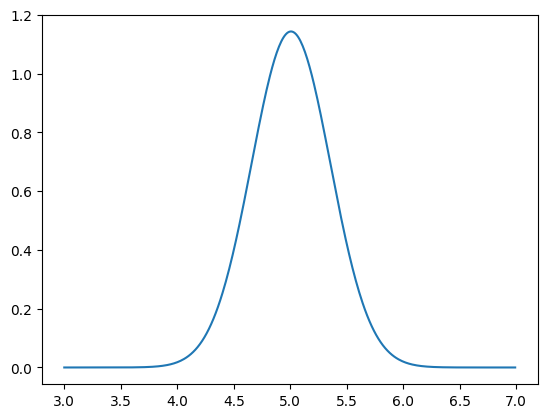

In [45]:

x = np.arange(3, 7, 0.01)
plt.plot(x, norm.pdf(x, mean_setosa, std_setosa))

In [46]:
gaussian_versicolor = np.random.normal(loc=mean_versicolor, scale=std_versicolor, size=None)
gaussian_versicolor

6.841053442492478

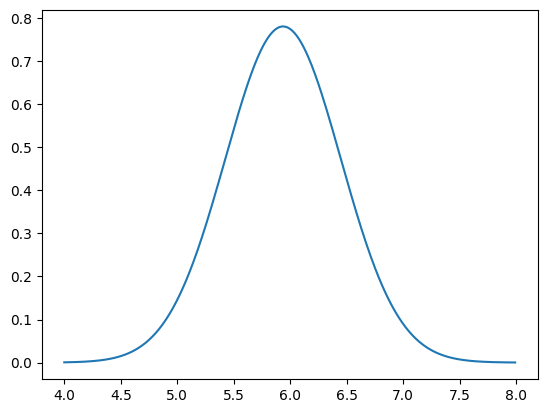

In [47]:

x = np.arange(4, 8, 0.01)
plt.plot(x, norm.pdf(x, mean_versicolor, std_versicolor))

In [48]:
gaussian_virginica = np.random.normal(loc=mean_virginica, scale=std_virginica, size=None)
gaussian_virginica

7.1154585825461805

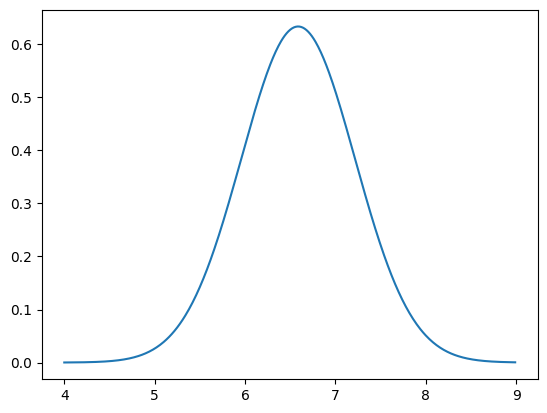

In [49]:
x = np.arange(4, 9, 0.01)
plt.plot(x, norm.pdf(x, mean_virginica, std_virginica))

In [50]:
gaussian_setosa = np.random.normal(loc=mean_setosa, scale=std_setosa, size=None)
gaussian_versicolor = np.random.normal(loc=mean_versicolor, scale=std_versicolor, size=None)
gaussian_virginica = np.random.normal(loc=mean_virginica, scale=std_virginica, size=None)
prob_sepal_length = gaussian_setosa*1/3 + gaussian_versicolor*1/3 + gaussian_virginica*1/3 
prob_sepal_length

6.2697260540807935

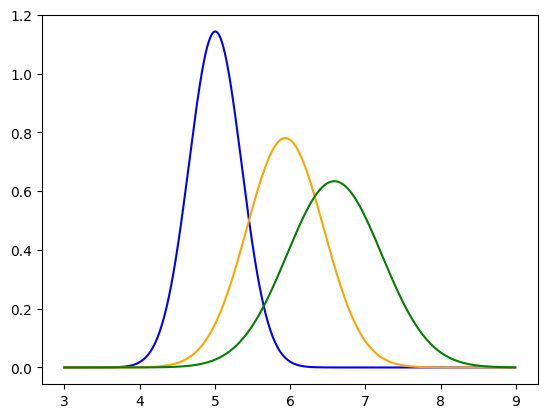

In [51]:
x = np.arange(3, 9, 0.01)
plt.plot(x, norm.pdf(x, mean_setosa, std_setosa), color='blue')
plt.plot(x, norm.pdf(x, mean_versicolor, std_versicolor), color='orange')
plt.plot(x, norm.pdf(x, mean_virginica, std_virginica), color='green')
plt.show()

In [57]:
lengths_set = [] 
lengths_ver = []
lengths_vir = []

for i in range(50):
    gaussian_setosa = np.random.normal(loc=mean_setosa, scale=std_setosa, size=None)
    gaussian_versicolor = np.random.normal(loc=mean_versicolor, scale=std_versicolor, size=None)
    gaussian_virginica = np.random.normal(loc=mean_virginica, scale=std_virginica, size=None)

    lengths_set.append(gaussian_setosa)
    lengths_ver.append(gaussian_versicolor)
    lengths_vir.append(gaussian_virginica)

<Figure size 1000x500 with 0 Axes>

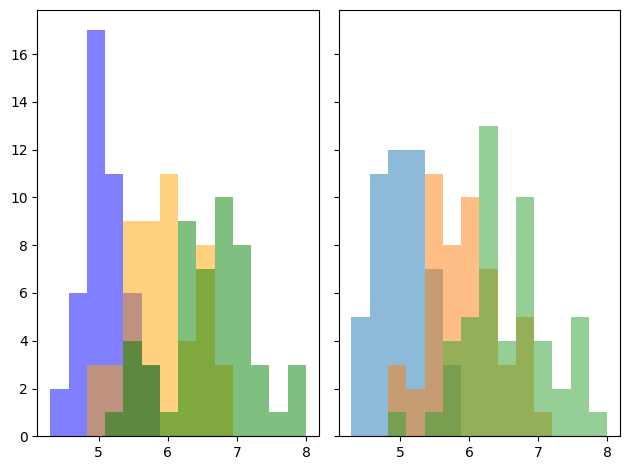

In [64]:
plt.figure(figsize=(10,5))
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, tight_layout=True)
bins = np.linspace(4.3,8,15)

axs[0].hist(lengths_set,bins,alpha=0.5, label=iris.target_names[0], color='blue')
axs[0].hist(lengths_ver,bins,alpha=0.5, label=iris.target_names[1], color='orange')
axs[0].hist(lengths_vir,bins,alpha=0.5, label=iris.target_names[2], color='green')

set_mean = np.mean(lengths_set)
vers_mean = np.mean(lengths_ver)
vir_mean = np.mean(lengths_vir)

x = X[:,0]

for i in range(3):
    plt.hist(x[y==i],bins,alpha=0.5, label=iris.target_names[i])

plt.show()

<Figure size 1000x500 with 0 Axes>

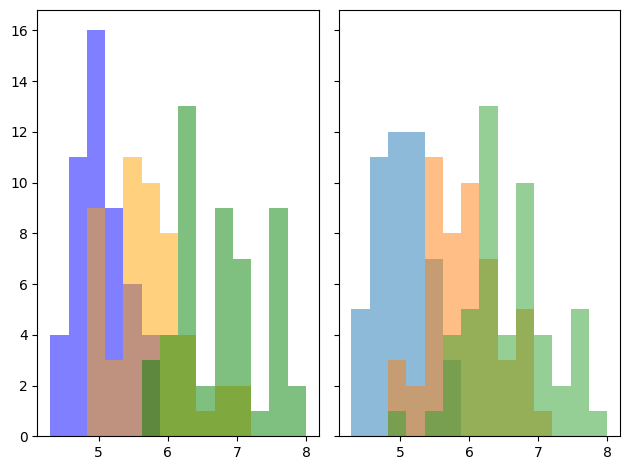

In [67]:
s_l = []
v_l = []
vi_l = []

for i in range(50):
    setosa_valor = np.random.choice(bins[:-1], size=1, p=setosa_proba)
    setosa_low, setosa_high = get_low_high(bins, setosa_valor)
    s = np.random.uniform(setosa_low, setosa_high, size=1)[0]

    versicolor_valor = np.random.choice(bins[:-1], size=1, p=versicolor_proba)
    versicolor_low, versicolor_high = get_low_high(bins, versicolor_valor)
    v = np.random.uniform(versicolor_low, versicolor_high, size=1)[0]

    virginica_valor = np.random.choice(bins[:-1], size=1, p=virginica_proba)
    virginica_low, virginica_high = get_low_high(bins, virginica_valor)
    vi = np.random.uniform(virginica_low, virginica_high, size=1)[0]

    s_l.append(s)
    v_l.append(v)
    vi_l.append(vi)

plt.figure(figsize=(10,5))
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, tight_layout=True)
bins = np.linspace(4.3,8,15)

axs[0].hist(s_l,bins,alpha=0.5, label=iris.target_names[0], color='blue')
axs[0].hist(v_l,bins,alpha=0.5, label=iris.target_names[1], color='orange')
axs[0].hist(vi_l,bins,alpha=0.5, label=iris.target_names[2], color='green')

x = X[:,0]

for i in range(3):
    plt.hist(x[y==i],bins,alpha=0.5, label=iris.target_names[i])

plt.show()
